# Init

In [2]:
import tensorflow as tf
import os
import pathlib
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from pathlib import Path
from PIL import Image
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder

from keras.preprocessing.image import load_img,img_to_array,array_to_img



# Tutorial

In [2]:

r1=tf.constant(1,tf.int8)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [6]:
r1

NameError: name 'r1' is not defined

In [ ]:
display(r1)

<tf.Tensor: shape=(), dtype=int8, numpy=1>

In [ ]:
r1.shape

TensorShape([])

In [ ]:
tf.shape(r1)


<tf.Tensor: shape=(0,), dtype=int32, numpy=array([], dtype=int32)>

In [ ]:
r1.ndim 

0

In [7]:
r2=tf.constant(1,tf.int16,name="my_scalar")

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
r2

<tf.Tensor: shape=(), dtype=int16, numpy=1>

In [ ]:
r1_decimal=tf.constant(1.12345,tf.float32)

In [ ]:
r1_decimal

<tf.Tensor: shape=(), dtype=float32, numpy=1.12345>

In [ ]:
print(r1_decimal)

tf.Tensor(1.12345, shape=(), dtype=float32)


In [ ]:
print(r2)

tf.Tensor(1, shape=(), dtype=int16)


In [ ]:
r1_vector = tf.constant([1,3,5], tf.int16)

In [ ]:
r1_vector.shape

TensorShape([3])

In [ ]:
r1_vector.ndim

1

In [ ]:
r2_matrix=tf.constant([[1,2],[3,4]],tf.int16)

In [ ]:
r3_matrix=tf.constant([ [[1, 2],
                           [3, 4], 
                           [5, 6]] ], tf.int16)
print(r3_matrix)

tf.Tensor(
[[[1 2]
  [3 4]
  [5 6]]], shape=(1, 3, 2), dtype=int16)


In [ ]:
r10=tf.ones([10, 10])
print(r10)

tf.Tensor(
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]], shape=(10, 10), dtype=float32)


In [ ]:
x=tf.constant([2.0],dtype=tf.float32)
print(tf.sqrt(x))

tf.Tensor([1.4142135], shape=(1,), dtype=float32)


# 26/7/2021

In [2]:
tf.__version__

'2.5.0'

In [83]:
PATH_TO_LABELS = '/home/rchuzh/programming/image_labelling_shrdc/src/lib/machine_learning/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
category_index

{1: {'id': 1, 'name': 'Hello'},
 2: {'id': 2, 'name': 'World'},
 3: {'id': 3, 'name': 'Car'},
 4: {'id': 4, 'name': 'Plane'},
 5: {'id': 5, 'name': 'shrdc'}}

In [84]:
DATA_DIR = '/home/chuzh/Documents/TensorFlow/workspace/training_demo'
MODELS_DIR = '/home/rchuzh/programming/image_labelling_shrdc/resources/dl_models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

PATH_TO_CKPT = os.path.join(MODELS_DIR, 'checkpoint/')
PATH_TO_CFG = os.path.join(MODELS_DIR, 'pipeline.config')

LABEL_FILENAME = 'labelmap.pbtxt'
PATH_TO_LABELS = os.path.join(MODELS_DIR, LABEL_FILENAME)


In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
category_index

In [ ]:
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
configs

In [ ]:
model_config = configs['model']
model_config

In [89]:
detection_model = model_builder.build(
        model_config=model_config, is_training=False)
detection_model


In [19]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()
ckpt

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                        use_display_name=True)

category_index

PIL.JpegImagePlugin.JpegImageFile

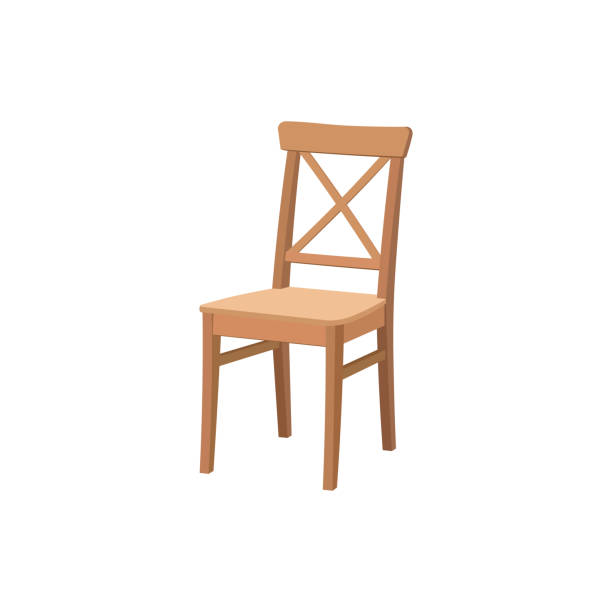

In [96]:
IMAGE_PATH='/home/rchuzh/Desktop/chair.jpg'
image=load_img(IMAGE_PATH)
display(type(image),image)


In [97]:
image=img_to_array(image)
display(image,image.shape)
image_expanded=np.expand_dims(image, axis=0)
image_expanded.shape

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

(612, 612, 3)

(1, 612, 612, 3)

In [98]:
input_tensor = tf.convert_to_tensor(
    image_expanded, dtype=tf.float32)
type(input_tensor)

tensorflow.python.framework.ops.EagerTensor

In [100]:
@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

In [101]:
detections, predictions_dict, shapes = detect_fn(input_tensor)

In [104]:
detections

AttributeError: 'dict' object has no attribute 'shape'

In [72]:
label_id_offset = 1
image_np_with_detections = image.copy()

In [79]:
vis_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'][0].numpy(),
            (detections['detection_classes']
             [0].numpy() + label_id_offset).astype(int),
            detections['detection_scores'][0].numpy(),
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.10,
            agnostic_mode=False)
image_np_with_detections=array_to_img(image_np_with_detections)



TypeError: copyto() argument 1 must be numpy.ndarray, not Image

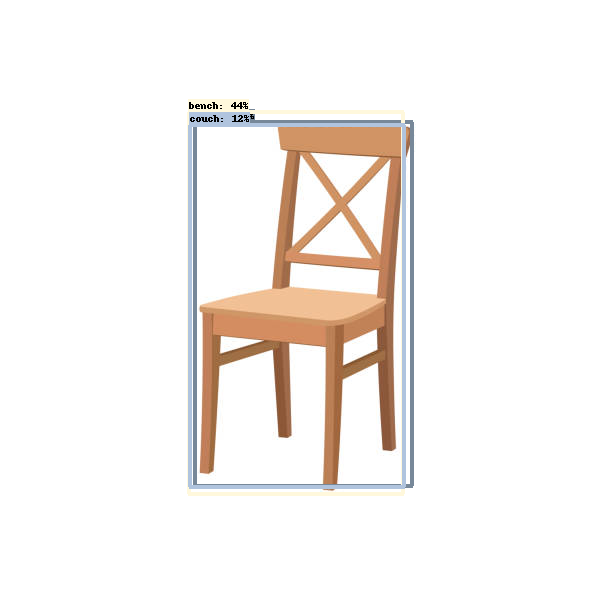

In [80]:
image_np_with_detections

# 27/7/2021